## Importando Bibliotecas

In [12]:
from sklearn.datasets import make_blobs
from matplotlib import pyplot as plt
from numpy import where
# Dataset
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
#Modelo
from keras.layers import Dense
from keras.models import Sequential
from tensorflow.keras.optimizers import SGD
# Novas importações
from sklearn.datasets import make_gaussian_quantiles
import pandas as pd
import numpy as np

## Visualização exploratória dos dados

In [13]:
n_classes=20
n_features=100
X, y = make_blobs(n_samples=1000, centers=n_classes, n_features=n_features, cluster_std=2, random_state=2)

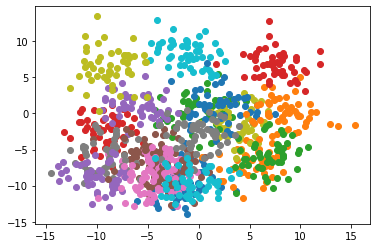

In [14]:
for class_value in range(n_classes):
    row_ix = where(y == class_value)
    plt.scatter(X[row_ix, 0], X[row_ix, 1])
plt.show()

## Criando o conjunto de treino e teste

In [15]:
def create_dataset():
    # cov = A matriz de covariância será esse valor vezes a matriz unitária. 
    # n_samples = O número total de pontos dividido igualmente entre as classes.
    # n_features = O número de recursos para cada amostra.
    # n_classes = O número de classes.
    # random_state = Determina a geração de números aleatórios para a criação do conjunto de dados.
    X1, y1 = make_gaussian_quantiles(cov=3., n_samples=10000, n_features=2, n_classes=3, random_state=1)
    X1 = pd.DataFrame(X1,columns=['x','y'])
    y1 = pd.Series(y1)

    X2, y2 = make_gaussian_quantiles(mean=(4, 4), cov=1, n_samples=5000, n_features=2, n_classes=3, random_state=1)
    X2 = pd.DataFrame(X2,columns=['x','y'])
    y2 = pd.Series(y2)

    X = pd.DataFrame(np.concatenate((X1, X2)))
    y = pd.Series(np.concatenate((y1, - y2 + 1)))
     
    y_categorical = to_categorical(y)
    
    # divisão treino/teste
    X_train, X_test, y_train, y_test = train_test_split(X, y_categorical, test_size=0.30, shuffle = True, random_state=42)
    return X_train, y_train, X_test, y_test

In [16]:
X_train, y_train, X_test, y_test = create_dataset()

In [17]:
print(X_train.shape, y_train.shape, X_test.shape,y_test.shape)

(10500, 2) (10500, 3) (4500, 2) (4500, 3)


## Treinando e avaliando o modelo 

In [18]:
def model_training(n_nodes, X_train, y_train):

    n_input, n_classes = X_train.shape[1], y_test.shape[1]
    
    model = Sequential()
    model.add(Dense(n_nodes, input_dim=n_input, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(n_classes, activation='softmax'))
    print(model.summary())

    # Compilando e treinando o modelo    
    opt = SGD(learning_rate=0.01, momentum=0.9)
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=100, verbose=0)
    return model, history

In [19]:
def model_evaluation(model,X_test, y_test):
    _, test_acc = model.evaluate(X_test, y_test, verbose=0)
    return test_acc

## Avaliando a capacidade do modelo

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            (None, 1)                 3         
                                                                 
 dense_37 (Dense)            (None, 3)                 6         
                                                                 
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________
None
nós=1: 0.432
Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_38 (Dense)            (None, 2)                 6         
                                                                 
 dense_39 (Dense)            (None, 3)                 9         
                                                                 
Total params: 15
T

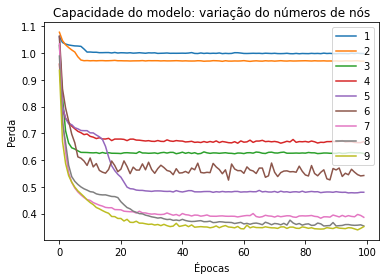

In [20]:
for n_nodes in range(1,10):
    
    model, history = model_training(n_nodes, X_train, y_train)
    test_acc = model_evaluation(model,X_test, y_test)
    print('nós=%d: %.3f' % (n_nodes, test_acc))
    plt.plot(history.history['loss'], label=str(n_nodes))

plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.title('Capacidade do modelo: variação do números de nós')    
plt.legend()
plt.show()

In [21]:
def model_training(n_nodes, n_layers, X_train, y_train):

    n_input, n_classes = X_train.shape[1], y_test.shape[1]
    
    # definindo a arquitetura do modelo 
    model = Sequential()
    model.add(Dense(n_nodes, input_dim=n_input, activation='relu', kernel_initializer='he_uniform'))
    for _ in range(1, n_layers):
        model.add(Dense(n_nodes, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(n_classes, activation='softmax'))
    
    # Compilando e treinando o modelo
    opt = SGD(learning_rate=0.01, momentum=0.9)
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=100, verbose=0)
    return model, history

camadas=1; nós=1: 0.432
camadas=1; nós=2: 0.546
camadas=1; nós=3: 0.492
camadas=1; nós=4: 0.712
camadas=1; nós=5: 0.708
camadas=1; nós=6: 0.822
camadas=1; nós=7: 0.742
camadas=1; nós=8: 0.763
camadas=1; nós=9: 0.800
camadas=1; nós=10: 0.937
camadas=1; nós=11: 0.884
camadas=1; nós=12: 0.881
camadas=1; nós=13: 0.828


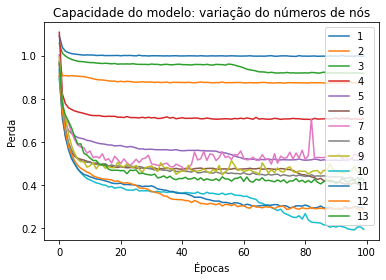

camadas=2; nós=1: 0.326
camadas=2; nós=2: 0.431
camadas=2; nós=3: 0.689
camadas=2; nós=4: 0.718
camadas=2; nós=5: 0.872
camadas=2; nós=6: 0.830
camadas=2; nós=7: 0.953
camadas=2; nós=8: 0.872
camadas=2; nós=9: 0.931
camadas=2; nós=10: 0.860
camadas=2; nós=11: 0.875
camadas=2; nós=12: 0.879
camadas=2; nós=13: 0.935


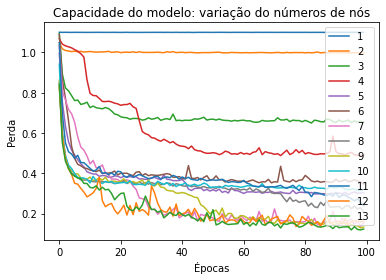

camadas=3; nós=1: 0.326
camadas=3; nós=2: 0.326
camadas=3; nós=3: 0.680
camadas=3; nós=4: 0.347
camadas=3; nós=5: 0.951
camadas=3; nós=6: 0.947
camadas=3; nós=7: 0.937
camadas=3; nós=8: 0.934
camadas=3; nós=9: 0.964
camadas=3; nós=10: 0.944
camadas=3; nós=11: 0.884
camadas=3; nós=12: 0.935
camadas=3; nós=13: 0.944


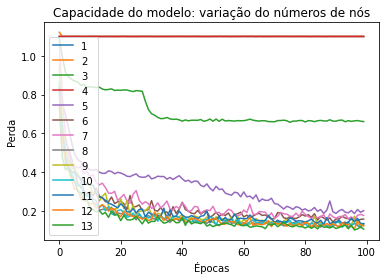

camadas=4; nós=1: 0.326
camadas=4; nós=2: 0.581
camadas=4; nós=3: 0.327
camadas=4; nós=4: 0.921
camadas=4; nós=5: 0.899
camadas=4; nós=6: 0.916
camadas=4; nós=7: 0.942
camadas=4; nós=8: 0.951
camadas=4; nós=9: 0.926
camadas=4; nós=10: 0.936
camadas=4; nós=11: 0.955
camadas=4; nós=12: 0.947
camadas=4; nós=13: 0.919


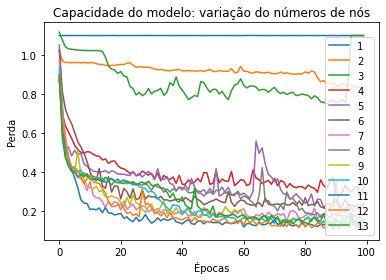

camadas=5; nós=1: 0.327
camadas=5; nós=2: 0.327


KeyboardInterrupt: 

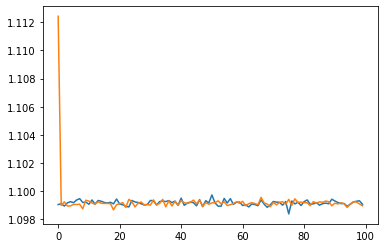

In [22]:
for n_layers in range(1,10):
    for n_nodes in range(1,14):
        model, history = model_training(n_nodes, n_layers, X_train, y_train)
        test_acc = model_evaluation(model,X_test, y_test)
        print('camadas=%d; nós=%d: %.3f' % (n_layers, n_nodes, test_acc))
        plt.plot(history.history['loss'], label=str(n_nodes))

    plt.xlabel('Épocas')
    plt.ylabel('Perda')
    plt.title('Capacidade do modelo: variação do números de nós')    
    plt.legend()
    plt.show()